In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%pylab inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import optimizers

Populating the interactive namespace from numpy and matplotlib


In [0]:
model = Sequential()

In [4]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 2s 0us/step


In [0]:
model.add(conv_base)
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=3, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 16, 16, 512)       14714688  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               33554688  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 48,270,147
Trainable params: 48,270,147
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_base.trainable = False

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [0]:
train_path='drive/My Drive/CODELABS/dataset_updated/train/'
validation_path='drive/My Drive/CODELABS/dataset_updated/validation/'
test_path='drive/My Drive/CODELABS/dataset_updated/test/'
train_datagen = ImageDataGenerator(rotation_range=40,shear_range=0.2,width_shift_range=0.2, height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rotation_range=40,shear_range=0.2,width_shift_range=0.2, height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(512, 512),batch_size=32, class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_path,target_size=(512, 512),batch_size=32,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path,target_size=(512, 512),batch_size=32,class_mode='categorical')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1729 images belonging to 3 classes.
Found 690 images belonging to 3 classes.
Found 654 images belonging to 3 classes.


In [12]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 290s 3s/step - loss: 0.4828 - acc: 0.8008 - val_loss: 2.0716 - val_acc: 0.2920
Epoch 2/30
100/100 [==============================] - 272s 3s/step - loss: 0.4685 - acc: 0.7986 - val_loss: 2.1877 - val_acc: 0.2494
Epoch 3/30
100/100 [==============================] - 268s 3s/step - loss: 0.4359 - acc: 0.8180 - val_loss: 2.6318 - val_acc: 0.1730
Epoch 4/30
100/100 [==============================] - 268s 3s/step - loss: 0.4448 - acc: 0.8204 - val_loss: 2.3166 - val_acc: 0.2036
Epoch 5/30
100/100 [==============================] - 269s 3s/step - loss: 0.4225 - acc: 0.8212 - val_loss: 2.6175 - val_acc: 0.1139
Epoch 6/30
100/100 [==============================] - 259s 3s/step - loss: 0.4240 - acc: 0.8365 - val_loss: 2.0224 - val_acc: 0.2964
Epoch 7/30
100/100 [==============================] - 277s 3s/step - loss: 0.3798 - acc: 0.8416 - val_loss: 2.2551 - val_acc: 0.2290
Epoch 8/30
100/100 [==============================] - 268s 3s/step - 

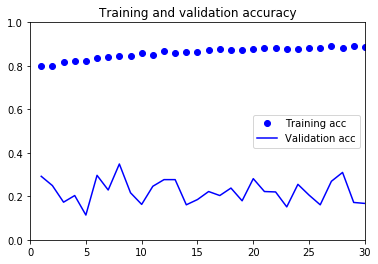

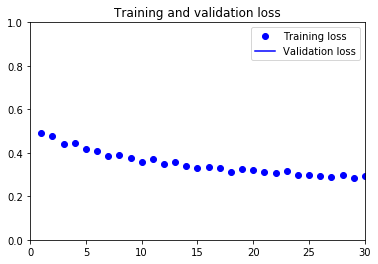

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.axis([0, 30, 0, 1])
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.axis([0, 30, 0, 1])
plt.title('Training and validation loss')
plt.legend()
plt.show()